### Fitting DataSets to Shallow and Deep Neural Net

#### Easy (Titanic)

Preprocessing

In [40]:
import pandas as pd
import numpy as np
import re
import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [41]:
# https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [42]:
# Load data
titanic = pd.read_csv(r"C:\Users\Axel\Documents\Nova_IMS\2_Semester\Deep Learning\Project\data_files\data_files\Easy\titanic.csv")

In [43]:
# Drop ticket, home.dest, boat, body
titanic = titanic.drop(['ticket'], axis=1)
titanic = titanic.drop(['home.dest'], axis=1)
titanic = titanic.drop(['boat'], axis=1)
titanic = titanic.drop(['body'], axis=1)

In [44]:
# Deal with cabin missing values
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic['cabin'] = titanic['cabin'].fillna("U0")
titanic['deck'] = titanic['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic['deck'] = titanic['deck'].map(deck)
titanic['deck'] = titanic['deck'].fillna(0)
titanic['deck'] = titanic['deck'].astype(int)
# we can now drop the cabin feature
titanic = titanic.drop(['cabin'], axis=1)

In [45]:
# Deal with Age missing values
mean = titanic["age"].mean()
std = titanic["age"].std()
is_null = titanic["age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = titanic["age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic["age"] = age_slice
titanic["age"] = titanic["age"].astype(int)

In [46]:
# Deal with Embarked missing values
common_value = 'S'
titanic['embarked'] = titanic['embarked'].fillna(common_value)

In [47]:
# Converting Fares
titanic['fare'] = titanic['fare'].fillna(0)
titanic['fare'] = titanic['fare'].astype(int)

In [48]:
# Converting Names
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

# extract titles
titanic['title'] = titanic.name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
titanic['title'] = titanic['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')
# convert titles into numbers
titanic['title'] = titanic['title'].map(titles)
# filling NaN with 0, to get safe
titanic['title'] = titanic['title'].fillna(0)
titanic = titanic.drop(['name'], axis=1)

In [49]:
# Converting Sex
genders = {"male": 0, "female": 1}
titanic['sex'] = titanic['sex'].map(genders)

In [50]:
# Converting Embarked
ports = {"S": 0, "C": 1, "Q": 2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [51]:
# Rearrange columns
titanic = titanic[['pclass', "sex","age","sibsp","parch","fare", "embarked", "deck", "title", "survived"]]

In [52]:
# Encoding

In [53]:
onehotencoder = OneHotEncoder(categorical_features = [0, 3, 4, 7, 8])
titanic = onehotencoder.fit_transform(titanic).toarray()

C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Axel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [54]:
titanic = pd.DataFrame(titanic)

In [55]:
titanic.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,29.0,211.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,151.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,151.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,30.0,151.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,25.0,151.0,0.0,0.0


Split to train and test set

In [58]:
# Create train, test set
y = titanic[36]
X = titanic.drop(36, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# get validation set
x_val = X_train[:100]
partial_X_train = X_train[100:]
y_val = y_train[:100]
partial_y_train = y_train[100:]

Shallow Neural Net

In [60]:
def keras_shallow(input_dim=39, n_layers=3, n_neurons=6, r_dropout=0.5, optimizer="rmsprop", loss="binary_crossentropy", init="uniform", metrics=["accuracy"], random_state=42):
    """
    shallow neural net, define the amount of layers either having 1 or 2 hidden layers., which optimizer you want to use and which loss function you want to apply.
    """ 
    np.random.seed(random_state)
    

    from keras import backend as K
    K.clear_session()


    model = models.Sequential()
    model.add(layers.Dense(n_neurons, activation="relu", input_dim=input_dim))
    model.add(layers.Dropout(r_dropout))
    for num in range(n_layers-2):
        model.add(layers.Dense(n_neurons, activation="relu"))
        model.add(layers.Dropout(r_dropout))
    model.add(layers.Dense(1, activation="sigmoid", init=init))
    model.compile(optimizer, loss, metrics=metrics)
    
    return model

In [61]:
shallow_nn = keras_shallow(input_dim=len(X_train.columns))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\Axel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [62]:
history_shallow = shallow_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 816 samples, validate on 100 samples
Epoch 1/20
816/816 [==============================] - 0s 413us/step - loss: 0.6835 - acc: 0.6042 - val_loss: 0.6826 - val_acc: 0.6800
Epoch 2/20
816/816 [==============================] - 0s 10us/step - loss: 0.6820 - acc: 0.5944 - val_loss: 0.6814 - val_acc: 0.6800
Epoch 3/20
816/816 [==============================] - 0s 11us/step - loss: 0.6720 - acc: 0.6446 - val_loss: 0.6767 - val_acc: 0.6800
Epoch 4/20
816/816 [==============================] - 0s 16us/step - loss: 0.6750 - acc: 0.6091 - val_loss: 0.6741 - val_acc: 0.6700
Epoch 5/20
816/816 [==============================] - 0s 11us/step - loss: 0.6708 - acc: 0.6140 - val_loss: 0.6709 - val_acc: 0.6700
Epoch 6/20
816/816 [==============================] - 0s 9us/step - loss: 0.6711 - acc: 0.6213 - val_loss: 0.6706 - val_acc: 0.6700
Epoch 7/20
816/816 [==============================] - 0s 15us/step - loss: 0.6680 - acc: 0.6348 - val_loss: 

In [63]:
history_dict = history_shallow.history

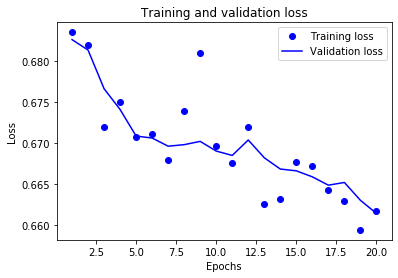

In [64]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

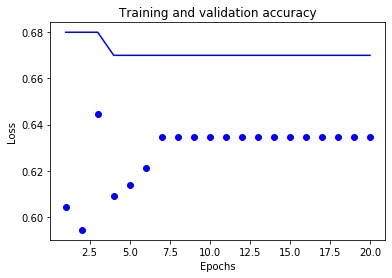

In [65]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

In [66]:
shallow_nn.predict(X_test)

array([[0.4327729 ],
       [0.4720212 ],
       [0.42942646],
       [0.43759528],
       [0.45930257],
       [0.44340605],
       [0.44959128],
       [0.45064363],
       [0.43737006],
       [0.48440355],
       [0.4816153 ],
       [0.45609626],
       [0.4765286 ],
       [0.4227532 ],
       [0.4361255 ],
       [0.46972996],
       [0.4359087 ],
       [0.44830137],
       [0.48032475],
       [0.47026655],
       [0.45802465],
       [0.43103832],
       [0.45635328],
       [0.46362826],
       [0.45613456],
       [0.48615986],
       [0.42879668],
       [0.44769022],
       [0.45462278],
       [0.4776884 ],
       [0.45232487],
       [0.48665246],
       [0.4798334 ],
       [0.48323974],
       [0.487742  ],
       [0.44748425],
       [0.4890308 ],
       [0.44221365],
       [0.4878669 ],
       [0.46859896],
       [0.44264722],
       [0.46122476],
       [0.42588758],
       [0.4539731 ],
       [0.4678018 ],
       [0.4614355 ],
       [0.44074714],
       [0.463

Deep Neural Network

In [67]:
def keras_deep(input_dim=39, n_layers=9, n_neurons=12, r_dropout=0.5, optimizer="rmsprop", loss="binary_crossentropy", init="uniform", metrics=["accuracy"], random_state=42):
    """
    Keras Neural Network, define the amount of layers you want, which optimizer you want to use and which loss function you want to apply.
    """ 
    np.random.seed(random_state)
    

    from keras import backend as K
    K.clear_session()


    model = models.Sequential()
    model.add(layers.Dense(n_neurons, activation="relu", input_dim=input_dim))
    model.add(layers.Dropout(r_dropout))
    for num in range(n_layers-2):
        model.add(layers.Dense(n_neurons, activation="relu"))
        model.add(layers.Dropout(r_dropout))
    model.add(layers.Dense(1, activation="sigmoid", init=init))
    model.compile(optimizer, loss, metrics=metrics)
    
    return model

In [68]:
deep_nn = keras_deep(input_dim=len(X_train.columns))

C:\Users\Axel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [69]:
history_deep = deep_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 816 samples, validate on 100 samples
Epoch 1/20
816/816 [==============================] - 1s 877us/step - loss: 0.7272 - acc: 0.6078 - val_loss: 0.6919 - val_acc: 0.6700
Epoch 2/20
816/816 [==============================] - 0s 17us/step - loss: 0.6991 - acc: 0.6127 - val_loss: 0.6912 - val_acc: 0.6700
Epoch 3/20
816/816 [==============================] - 0s 22us/step - loss: 0.7102 - acc: 0.6311 - val_loss: 0.6908 - val_acc: 0.6700
Epoch 4/20
816/816 [==============================] - 0s 17us/step - loss: 0.6935 - acc: 0.6066 - val_loss: 0.6903 - val_acc: 0.6700
Epoch 5/20
816/816 [==============================] - 0s 22us/step - loss: 0.6957 - acc: 0.6201 - val_loss: 0.6899 - val_acc: 0.6700
Epoch 6/20
816/816 [==============================] - 0s 20us/step - loss: 0.7004 - acc: 0.6140 - val_loss: 0.6895 - val_acc: 0.6700
Epoch 7/20
816/816 [==============================] - 0s 21us/step - loss: 0.6923 - acc: 0.6311 - val_loss: 0.6891 - val_acc: 0.6700
Epoch 8/20
816/816 [==

In [70]:
history_dict = history_deep.history

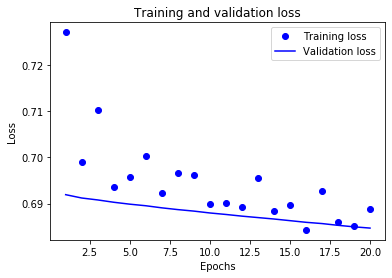

In [71]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

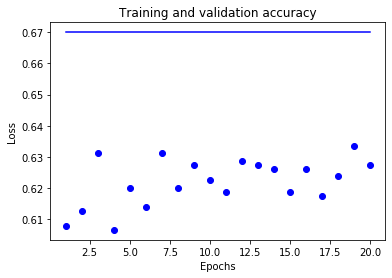

In [72]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

In [73]:
deep_nn.predict(X_test)

array([[0.48708877],
       [0.4868024 ],
       [0.48708913],
       [0.4870624 ],
       [0.48695746],
       [0.48709235],
       [0.48698977],
       [0.48704654],
       [0.4870826 ],
       [0.4864001 ],
       [0.48635405],
       [0.48706126],
       [0.48683354],
       [0.48708984],
       [0.4870671 ],
       [0.4868815 ],
       [0.48708004],
       [0.48699123],
       [0.48634577],
       [0.48686746],
       [0.48694906],
       [0.48705134],
       [0.48695803],
       [0.48696044],
       [0.48696554],
       [0.48639175],
       [0.48711964],
       [0.487003  ],
       [0.48697522],
       [0.48633525],
       [0.4870486 ],
       [0.4863912 ],
       [0.48674574],
       [0.4864001 ],
       [0.48638523],
       [0.4870298 ],
       [0.48639658],
       [0.4871021 ],
       [0.4864097 ],
       [0.48677912],
       [0.48703948],
       [0.48694357],
       [0.4871073 ],
       [0.4869993 ],
       [0.4869142 ],
       [0.4869358 ],
       [0.48706216],
       [0.486

#### Santander (Big)

Preprocessing

In [77]:
# Load data
santander = pd.read_csv(r"C:\Users\Axel\Documents\Nova_IMS\2_Semester\Deep Learning\Project\data_files\data_files\Big\santander.csv")

In [81]:
santander = santander.drop(["ID_code"], axis=1)

Split train and test data

In [84]:
# Get train and test set
y = santander.target
X = santander.drop(["target"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
# get validation set
x_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Shallow Neural Net

In [87]:
shallow_nn = keras_shallow(input_dim=len(X_train.columns))

C:\Users\Axel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [88]:
history_shallow = shallow_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 130000 samples, validate on 10000 samples
Epoch 1/20
130000/130000 [==============================] - 2s 16us/step - loss: 0.4379 - acc: 0.8983 - val_loss: 0.3721 - val_acc: 0.9033
Epoch 2/20
130000/130000 [==============================] - 2s 14us/step - loss: 0.3824 - acc: 0.9001 - val_loss: 0.3337 - val_acc: 0.9033
Epoch 3/20
130000/130000 [==============================] - 2s 14us/step - loss: 0.3417 - acc: 0.9001 - val_loss: 0.2846 - val_acc: 0.9033
Epoch 4/20
130000/130000 [==============================] - 2s 14us/step - loss: 0.3187 - acc: 0.9001 - val_loss: 0.2877 - val_acc: 0.9033
Epoch 5/20
130000/130000 [==============================] - 2s 16us/step - loss: 0.3065 - acc: 0.9001 - val_loss: 0.2767 - val_acc: 0.9033
Epoch 6/20
130000/130000 [==============================] - 2s 15us/step - loss: 0.3020 - acc: 0.9001 - val_loss: 0.2761 - val_acc: 0.9033
Epoch 7/20
130000/130000 [==============================] - 2s 15us/step - loss: 0.2985 - acc: 0.9001 - val_loss: 0

In [89]:
history_dict = history_shallow.history

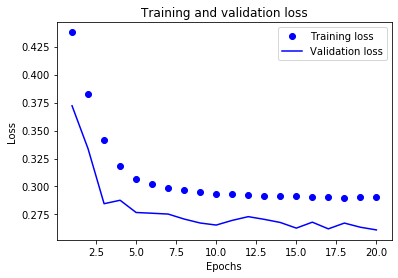

In [90]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

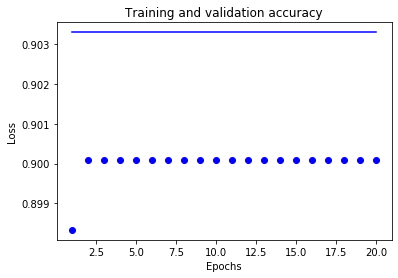

In [91]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [92]:
shallow_nn.predict(X_test)

array([[0.00298229],
       [0.01059318],
       [0.01352924],
       ...,
       [0.1709821 ],
       [0.00246036],
       [0.06841257]], dtype=float32)

Deep Neural Network

In [93]:
deep_nn = keras_deep(input_dim=len(X_train.columns))

C:\Users\Axel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


In [94]:
history_deep = deep_nn.fit(partial_X_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 130000 samples, validate on 10000 samples
Epoch 1/20
130000/130000 [==============================] - 4s 33us/step - loss: 0.5111 - acc: 0.8982 - val_loss: 0.5150 - val_acc: 0.9033
Epoch 2/20
130000/130000 [==============================] - 4s 29us/step - loss: 0.3787 - acc: 0.9001 - val_loss: 0.3208 - val_acc: 0.9033
Epoch 3/20
130000/130000 [==============================] - 4s 30us/step - loss: 0.3416 - acc: 0.9001 - val_loss: 0.3198 - val_acc: 0.9033
Epoch 4/20
130000/130000 [==============================] - 3s 23us/step - loss: 0.3354 - acc: 0.9001 - val_loss: 0.3185 - val_acc: 0.9033
Epoch 5/20
130000/130000 [==============================] - 3s 24us/step - loss: 0.3314 - acc: 0.9001 - val_loss: 0.3194 - val_acc: 0.9033
Epoch 6/20
130000/130000 [==============================] - 3s 25us/step - loss: 0.3289 - acc: 0.9001 - val_loss: 0.3200 - val_acc: 0.9033
Epoch 7/20
130000/130000 [==============================] - 3s 25us/step - loss: 0.3259 - acc: 0.9001 - val_loss: 0

In [95]:
history_dict = history_deep.history

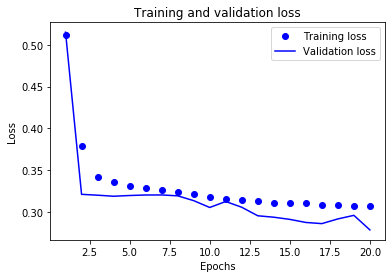

In [96]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

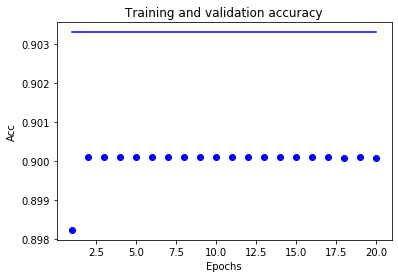

In [97]:
plt.clf()
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

In [98]:
deep_nn.predict(X_test)

array([[0.0032621 ],
       [0.01127154],
       [0.02029282],
       ...,
       [0.14723119],
       [0.00116962],
       [0.05549914]], dtype=float32)

#### Weather Australia (Time Series)

In [100]:
weather = pd.read_csv(r"C:\Users\Axel\Documents\Nova_IMS\2_Semester\Deep Learning\Project\data_files\data_files\TimeSeries\weatherAUS.csv")

In [101]:
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No
